In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
player = pd.read_csv('nba_player_file_new.csv')

In [9]:
player = player.replace('-',np.nan)
player = player.dropna()
print(player)

                        Name  Pos  Active  HoF  All_Star  All_Nba  All_Def  \
0             Alaa Abdelnaby    4       0    0         0        0        0   
2        Kareem Abdul-Jabbar    5       0    1        19       15       11   
3         Mahmoud Abdul-Rauf    1       0    0         0        0        0   
4          Tariq Abdul-Wahad    2       0    0         0        0        0   
5        Shareef Abdur-Rahim    3       0    0         1        0        0   
6              Tom Abernethy    3       0    0         0        0        0   
9               Alex Abrines    2       1    0         0        0        0   
10                Alex Acker    2       0    0         0        0        0   
12                Mark Acres    5       0    0         0        0        0   
14                Quincy Acy    3       0    0         0        0        0   
15               Alvan Adams    4       0    0         1        0        0   
16                 Don Adams    3       0    0         0        

In [3]:
player_1 = (player[(player['Name']=='LeBron James')])

print(player_1.iloc[0])


Name           LeBron James
Pos                       3
Active                    1
HoF                       0
All_Star                 14
All_Nba                  14
All_Def                   6
Score_Champ               1
Assit_Champ               0
Trb_Champ                 0
MVP                       4
GP                     1177
PPG                    27.2
TRPG                    7.4
APG                     7.2
BPG                     0.8
SPG                     1.6
3PG                     1.4
TP                    31966
TR                     8698
TAST                   8451
TBLKS                   912
TSTLS                  1909
T3PS                   1684
FG%                    50.4
FT%                    73.8
3P%                    34.4
EF%                    54.1
DRTG                    103
ORTG                    116
VORP                  127.7
BPM                     9.1
EFF                    27.7
Win_Shares            224.5
Name: 2001, dtype: object


In [4]:
active_players = (player[(player['Active']==1)])
player_value = (active_players.iloc[:,[28,29]].values).astype(int)
player_name = active_players.iloc[:,0].values
print(player_value)

[[110 112]
 [105 118]
 [105 116]
 [102  83]
 [106 112]
 [114  90]
 [109 122]
 [106 102]
 [107 106]
 [101 109]
 [109 115]
 [105 112]
 [108 108]
 [108 109]
 [113 118]
 [105 106]
 [111 110]
 [110 118]
 [111  95]
 [112 113]
 [112  94]
 [108  87]
 [106  98]
 [106 105]
 [110 105]
 [108 107]
 [110 107]
 [107 110]
 [109 104]
 [104 110]
 [105  98]
 [109 108]
 [112 107]
 [108 100]
 [110 107]
 [105 119]
 [110  92]
 [114  93]
 [107 119]
 [108 113]
 [105 107]
 [111 112]
 [114  94]
 [107 107]
 [117 124]
 [114 108]
 [112 109]
 [102  75]
 [ 95  84]
 [114 104]
 [ 91 105]
 [107  98]
 [112 106]
 [109 111]
 [117  80]
 [112 101]
 [111 113]
 [113  99]
 [110 101]
 [108 103]
 [107 102]
 [110  90]
 [109 104]
 [112  92]
 [112 105]
 [112 129]
 [110 113]
 [112 103]
 [109 103]
 [106  95]
 [105 119]
 [112 117]
 [109 107]
 [112 102]
 [104 122]
 [107 110]
 [106 109]
 [108 104]
 [106  94]
 [109 106]
 [108 110]
 [103 118]
 [111 106]
 [110  98]
 [112 109]
 [110 102]
 [114 104]
 [109 117]
 [108 101]
 [110 112]
 [107 111]

In [5]:
ini1=[102.5,102.5]
ini2=[120,120]
c1=list()
c2=list()

In [6]:
def specific_player(player_name,player_value):
    for i in range(len(player_name)):
    
        if player_name[i] == "Stephen Curry" or player_name[i] == "LeBron James" or player_name[i] == "James Harden" or player_name[i] == "Kevin Durant" or player_name[i] == "Jeremy Lin" or player_name[i] == "Damian Lillard":

            plt.annotate(player_name[i],xy=(player_value[i,0],player_value[i,1]),
                         xytext=(-50, 30),
                         textcoords='offset points', ha='right', va='bottom',
                         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        

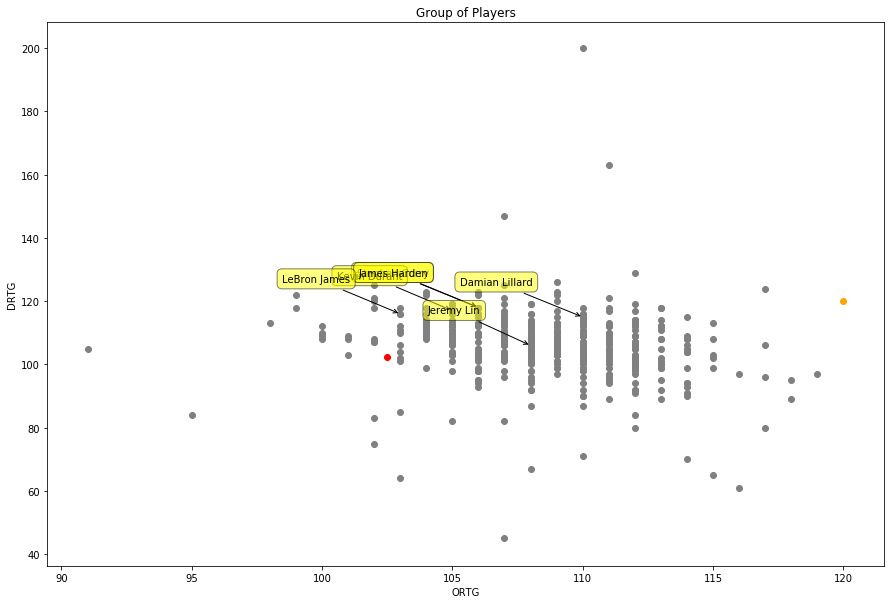

In [7]:
#before clustering
plt.figure(figsize=(15,10))
for i in range(len(player_name)):
    
    plt.scatter(x=player_value[i,0],y=player_value[i,1],color='gray')
    
specific_player(player_name,player_value)
        



plt.title('Group of Players')
plt.xlabel('ORTG')
plt.ylabel('DRTG')
plt.scatter(x=ini1[0],y=ini1[1],color='red')# 第一類中心
plt.scatter(x=ini2[0],y=ini2[1],color='orange')#  第二類中心

plt.show()

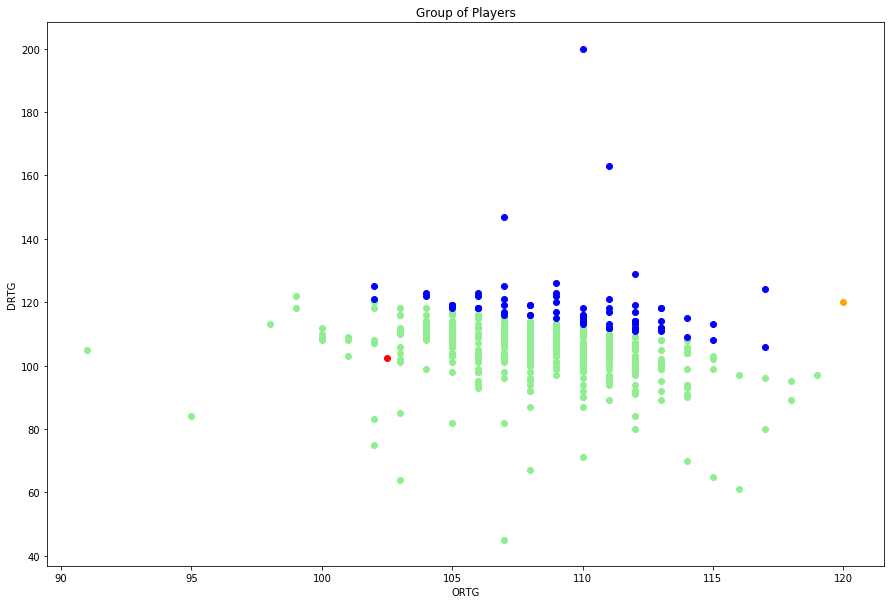

In [118]:
plt.figure(figsize=(15,10))
for n1,n2 in zip(player_value[:,0],player_value[:,1]):
    d1=((n1-ini1[0])**2+(n2-ini1[1])**2)**0.5
    d2=((n1-ini2[0])**2+(n2-ini2[1])**2)**0.5
    if d1<d2:
        c1.append([n1,n2])
    else:
        c2.append([n1,n2])
s1x=0
s1y=0
s2x=0
s2y=0
for i,j in c1: 
    plt.scatter(x=i,y=j,color='lightgreen')
    s1x+=i
    s1y+=j

for i,j in c2:    
    plt.scatter(x=i,y=j,color='blue')
    s2x+=i
    s2y+=j
    

    
plt.title('Group of Players')
plt.scatter(x=ini1[0],y=ini1[1],color='red')# 第一類中心
plt.scatter(x=ini2[0],y=ini2[1],color='orange')#  第二類中心
plt.xlabel('ORTG')
plt.ylabel('DRTG')
plt.show()

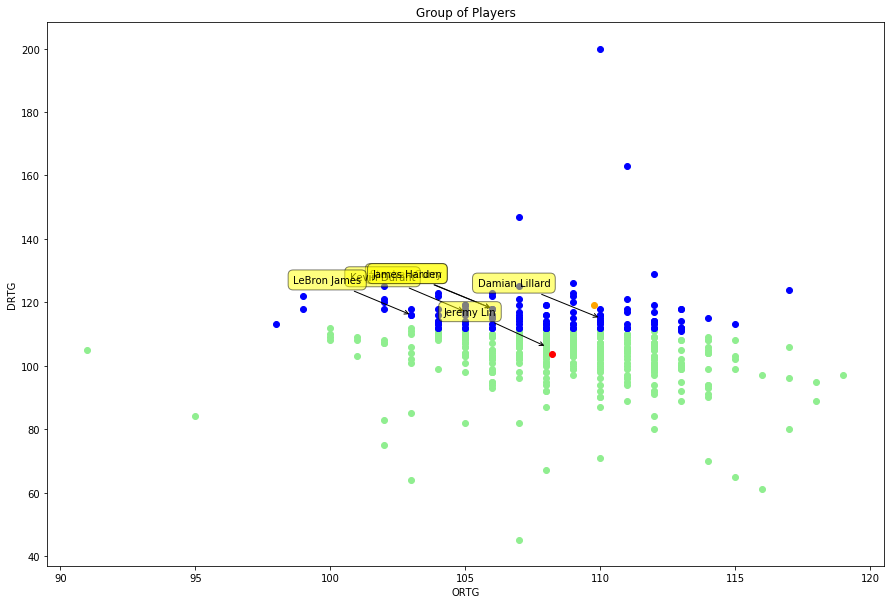

In [119]:
##central---repeat this step until it print 'Done'

ini1[0]=s1x/len(c1)
ini1[1]=s1y/len(c1)
ini2[0]=s2x/len(c2)
ini2[1]=s2y/len(c2)


c1=list()
c2=list()
plt.figure(figsize=(15,10))

for n1,n2 in zip(player_value[:,0],player_value[:,1]):
    d1=((n1-ini1[0])**2+(n2-ini1[1])**2)**0.5
    d2=((n1-ini2[0])**2+(n2-ini2[1])**2)**0.5
    if d1<d2:
        c1.append([n1,n2])
    else:
        c2.append([n1,n2])
s1x=0
s1y=0
s2x=0
s2y=0
for i,j in c1: 
    plt.scatter(x=i,y=j,color='lightgreen')
    s1x+=i
    s1y+=j
    

for i,j in c2:    
    plt.scatter(x=i,y=j,color='blue')
    s2x+=i
    s2y+=j
    

    
specific_player(player_name,player_value)
# for i in range(len(player_name)):
    
#     if player_name[i] == "Stephen Curry" or player_name[i] == "LeBron James" or player_name[i] == "James Harden" or player_name[i] == "Kevin Durant" or player_name[i] == "Jeremy Lin" or player_name[i] == "Damian Lillard":
     
#         plt.annotate(player_name[i],xy=(player_value[i,0],player_value[i,1]),
#                      xytext=(-50, 30),
#                      textcoords='offset points', ha='right', va='bottom',
#                      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#                      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        


    

    
    

plt.scatter(x=ini1[0],y=ini1[1],color='red')# 第一類中心
plt.scatter(x=ini2[0],y=ini2[1],color='orange')#  第二類中心
plt.title('Group of Players')
plt.xlabel('ORTG')
plt.ylabel('DRTG')
plt.show()

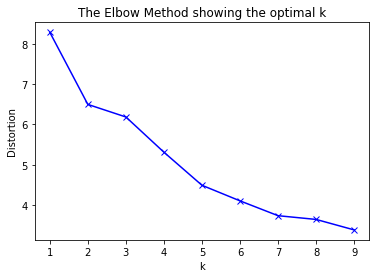

In [120]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(player_value)
    kmeanModel.fit(player_value)
    distortions.append(sum(np.min(cdist(player_value, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / player_value.shape[0])


# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
